In [161]:
%matplotlib inline
%env KERAS_BACKEND = tensorflow
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers.advanced_activations import PReLU

env: KERAS_BACKEND=tensorflow


In [162]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

## 歸一下

In [163]:
x_train_norm=(x_train - x_train.min())/(x_train.max()-x_train.min())
x_test_norm=(x_test - x_test.min())/(x_test.max()-x_test.min())

In [164]:
x_train= x_train_norm.reshape(60000,28*28)
x_test= x_test_norm.reshape(10000,28*28)

## 把y 變成 一條的形式[.......]

In [165]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

## 選擇自己要用來組合的函數

In [166]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras import losses

## 由於要讓他分岔 所以import 以下函數

In [167]:
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add

![title](IMG_7074.jpg)

## 定義function

In [168]:
fa_1 = Dense(487, activation='relu')
fa_2 = Dense(520, activation='relu')

fb_1 = Dense(8+9, activation='elu')
fb_2 = Dense(87, activation='relu')
fb_3 = Dense(5, activation='selu')
fb_4 = Dense(9, activation='elu')
fb_5 = Dense(4, activation='relu')
fb_6 = Dense(20, activation='elu')

fc_1 = Dense(9, activation='selu')
fc_2 = Dense(3, activation='elu')
fc_3 = Dense(6, activation='selu')

fd_1 = Dense(10, activation='softmax')



## 我們需要先定義輸入！

In [169]:
x = Input(shape=(784,))

## 定義神經元

In [170]:
#建立function 輸入、輸出間的關係
ha_1 = fa_1(x)
ha_2 = fa_2(x)

hb_1 = fa_1(x)
hb_2 = fa_1(x)

hb_3 = fa_2(x)
hb_4 = fa_2(x)
hb_5 = fa_2(x)
hb_6 = fa_2(x)

#合起來
hc_1 = fc_1(concatenate([hb_1,hb_2]))
hc_2= fc_2(concatenate([hb_3,hb_4,hb_5,hb_6]))
hc_3= fc_3(concatenate([hb_3,hb_4,hb_5,hb_6]))
#再次合起來

hc_4= fd_1(concatenate([hc_1,hc_2,hc_3]))



y=hc_4


## 偷看一下  好像有點多 反正是電腦算沒差拉

In [171]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 784)          0                                            
__________________________________________________________________________________________________
dense_232 (Dense)               (None, 487)          382295      input_12[0][0]                   
                                                                 input_12[0][0]                   
__________________________________________________________________________________________________
dense_233 (Dense)               (None, 520)          408200      input_12[0][0]                   
                                                                 input_12[0][0]                   
                                                                 input_12[0][0]                   
          

## 合體囉 

In [173]:
model.compile(loss='mean_squared_error',
                    optimizer=SGD(lr=0.87),
                      metrics =['accuracy'])

In [174]:
model_his=model.fit(x_train,y_train,batch_size = 100,
                            epochs = 25,
                            verbose =1,
                            validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 9s 156us/step - loss: 0.0198 - acc: 0.8764 - val_loss: 0.0108 - val_acc: 0.9311
Epoch 2/25
60000/60000 [==============================] - 8s 136us/step - loss: 0.0098 - acc: 0.9378 - val_loss: 0.0086 - val_acc: 0.9446
Epoch 3/25
60000/60000 [==============================] - 8s 137us/step - loss: 0.0076 - acc: 0.9527 - val_loss: 0.0071 - val_acc: 0.9540
Epoch 4/25
60000/60000 [==============================] - 8s 137us/step - loss: 0.0061 - acc: 0.9620 - val_loss: 0.0060 - val_acc: 0.9606
Epoch 5/25
60000/60000 [==============================] - 8s 139us/step - loss: 0.0051 - acc: 0.9688 - val_loss: 0.0054 - val_acc: 0.9658
Epoch 6/25
60000/60000 [==============================] - 8s 139us/step - loss: 0.0044 - acc: 0.9738 - val_loss: 0.0049 - val_acc: 0.9688
Epoch 7/25
60000/60000 [==============================] - 8s 140us/step - loss: 0.0038 - acc: 0.9775 - val_loss: 0.0051 - 

<function matplotlib.pyplot.show(*args, **kw)>

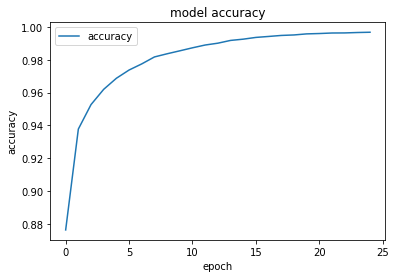

In [175]:
plt.plot(model_his.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["accuracy"],loc = "best")
plt.show